# Growth model

Here i simulate the basic growth model used by Charnov ect...

$$
\frac{dM}{dt} = aM^{\beta} - bM - cM^{\gamma}
$$

where $aM^{\beta}$ is energy intake with its mass scaling exponent, $bM$ is maintenece metabolism and $cM^{\gamma}$ is reproductive output.

the fitness ($R_0$) of an individual growing according to the model above can be obtained by integrating their reproductive output over time, including thier mortaility L(M):

$$
R_0 = \int_0^\infty cM^{\beta} L(M,t) dt
$$

This mortality function is set to an exponential decay function here:

$$
L(M,t) = e^{-\lambda Mt}
$$

where $\lambda$ is a rate parameter controling the rate at which the likelyhood of survival decreases.

I also consider the "switching on" of reproduction at some mass $M_{\alpha}$. This occurs instantly with a piecewise funtion for growth. 

In [6]:
using Pkg
import Pkg; Pkg.add("DifferentialEquations")
import Pkg; Pkg.add("DiffEqCallbacks")
import Pkg; Pkg.add("Plots")
Pkg.activate("..")

using DifferentialEquations, DiffEqCallbacks, Plots

 Resolving package versions...
  Updating `~/Thesis/Code/Project.toml`
  [0c46a032] + DifferentialEquations v6.6.0
  Updating `~/Thesis/Code/Manifest.toml`
  [764a87c0] + BoundaryValueDiffEq v2.3.0
  [bcd4f6db] + DelayDiffEq v5.13.0
  [5a0ffddc] + DiffEqFinancial v2.1.0
  [c894b116] + DiffEqJump v6.2.0
  [77a26b50] + DiffEqNoiseProcess v3.3.1
  [055956cb] + DiffEqPhysics v3.2.0
  [0c46a032] + DifferentialEquations v6.6.0
  [c619ae07] + DimensionalPlotRecipes v0.2.0
  [f9640e96] + MultiScaleArrays v1.5.0
  [e409e4f3] + PoissonRandom v0.4.0
  [e6cf234a] + RandomNumbers v1.3.0
  [ae5879a3] + ResettableStacks v0.6.0
  [9672c7b4] + SteadyStateDiffEq v1.5.0
  [789caeaf] + StochasticDiffEq v6.8.0
  [c3572dad] + Sundials v3.6.1
 Resolving package versions...
  Updating `~/Thesis/Code/Project.toml`
 [no changes]
  Updating `~/Thesis/Code/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/Thesis/Code/Project.toml`
  [91a5bcdd] + Plots v0.26.1
  Updating `~/Thesis/Code/Mani

In [9]:
# function dM(dM,M,p,t)
#     intak = p[:a_0] * (abs(M[1]) ^ p[:a_b])
#     maint = p[:b_0] * (abs(M[1]) ^ p[:b_b])
    
#     if M[1] < p[:Ma] 
#         repro = 0.0
#     else
#         repro = p[:c_0] * (M[1] ^ p[:c_b])
#     end
        
#     dM[1] = intak - maint - repro
#     dM[2] = repro * exp(-t * p[:L])
    
# end

dM (generic function with 1 method)

In [7]:
function dM(dM,M,p,t)
    intak = p[:a_0] * (abs(M[1]) ^ p[:a_b])
    maint = p[:b_0] * (abs(M[1]) ^ p[:b_b])
    
#     if M[1] < p[:Ma] 
#         repro = 0.0
    if t < p[:Alph] 
        repro = 0.0
    else
        repro = p[:c_0] * (abs(M[1]) ^ p[:c_b])
        end
        
    dM[1] = intak - maint - repro
    dM[2] = repro * exp(-(t-p[:Alph]) * p[:L])
    
#     if M[1] + dM[1] < 0
#         dM[1] = -M[1]
#     end
    
end

dM (generic function with 1 method)

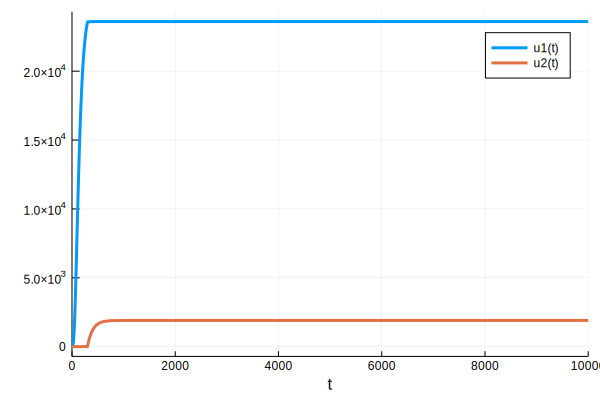

In [8]:
hypothetical_starting_mass = 0.1
hypothetical_asymptotic_mass = 25000
hypothetical_starting_reproduction = 0 #c * (hypothetical_starting_mass)^ rho
a = 0.7; a_b = 0.75
b = a/(hypothetical_asymptotic_mass^0.25)
c = 0.01 # West et al. assume 0.1 from Peters

p = Dict([(:a_0,a),(:a_b,a_b),
          (:b_0,b),(:b_b,1.0),
          (:c_0,c),(:c_b,0.75),
          (:L,0.01),(:Alph,300)])

M0 = [hypothetical_starting_mass, hypothetical_starting_reproduction]
# M0 = [1.,0.0]
tspan = (0.0,1e4)
prob = ODEProblem(dM,M0,tspan,p)
sol = solve(prob,Rosenbrock23())

# plot(hcat(sol.u...)')
plot(sol)

In [9]:
M_alph = sol(p[:Alph])[1]

23579.527388423823

###### sol.u

In [10]:

resolution = 100
c_vec = range(0.001,0.25,length = resolution)
c_b_vec = range(0.001,1.25,length = resolution)
results = Array{Float64,2}(undef,resolution,resolution)

tspan = (0.0,1e6)

for i in 1:resolution
    c_0 = c_vec[i]
    for j in 1:resolution
        c_b = c_b_vec[j]
        p = Dict([(:a_0,a),(:a_b,.75),
          (:b_0,b),(:b_b,1.0),
          (:c_0,c_0),(:c_b,c_b),
          (:L,0.1),(:Alph,0.0)])
        prob = ODEProblem(dM,M0,tspan,p)
        sol = solve(prob,Rosenbrock23())
        results[i,j] = sol[end][1]
    end
end


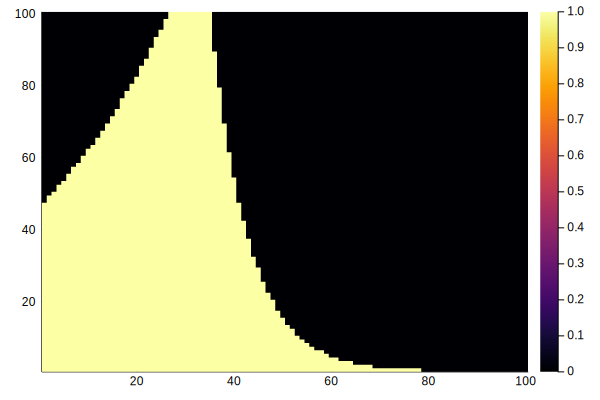

In [11]:
feas = results .> M_alph
heatmap(feas)

In [12]:

results = Array{Any,2}(undef,resolution,resolution)

M0 = [hypothetical_starting_mass, hypothetical_starting_reproduction]
tspan = (0.0,365 * 12)

for i in 1:resolution
    c_0 = c_vec[i]
    for j in 1:resolution
        c_b = c_b_vec[j]
        p = Dict([(:a_0,a),(:a_b,.75),
          (:b_0,b),(:b_b,1.0),
          (:c_0,c_0),(:c_b,c_b),
          (:L,0.1),(:Alph,300.0)])
        prob = ODEProblem(dM,M0,tspan,p)
        sol = solve(prob,Rosenbrock23())
        results[i,j] = sol
    end
end

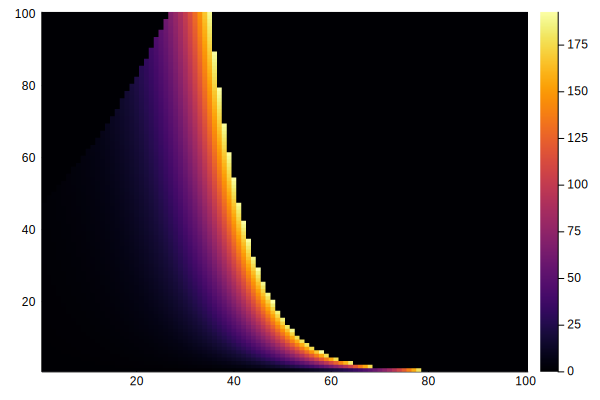

In [234]:
x = [i.u[end][2] for i = results]

heatmap(x .* feas )

In [104]:
results[i,j](p[:Alph])

2-element Array{Float64,1}:
 816.4813973521525      
  -1.1523864227722756e-6

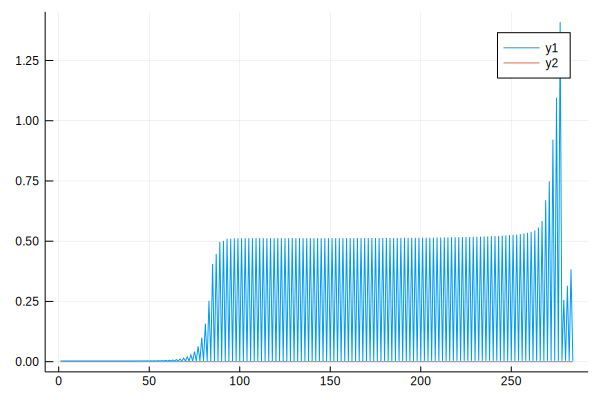

In [91]:
plot(hcat(results[19,20].(results[19,20], Val{1})...)')

In [70]:
x = rand(12)

sqrt.(x)

12-element Array{Float64,1}:
 0.9501025997692548 
 0.9679912504238535 
 0.9924794258662555 
 0.555031001755254  
 0.4303634171046196 
 0.6907394595280762 
 0.17677725788808543
 0.7921687117523317 
 0.9505717344280676 
 0.37990016790860365
 0.7126667778440238 
 0.7481613452844442 

In [29]:
N_sim = 100
M_eq = 4000
results = Array{Float64,2}(undef,N_sim,N_sim)

a_vec = range(0,maximum(M_eq)+1,length = N_sim)

for i = 1:N_sim
    for j = 1:N_sim
        if a_vec[i] <= M_eq[j]
            p = Dict([(:a_0,1.0),(:a_b,.75),
              (:b_0,0.1),(:b_b,1.0),
              (:c_0,0.6),(:c_b,c_b_vec[j]),
              (:L,0.1),(:Ma,a_vec[i])])
            
            prob = ODEProblem(dM,M0,tspan,p)
            sol = solve(prob,AutoTsit5(Rosenbrock23()),callback = cb)
            
            results[i,j] = sol[2,end]
        else
            results[i,j] = 0.0
        end
        
    
    end
end

heatmap(c_b_vec,a_vec,results)

UndefVarError: UndefVarError: c_b_vec not defined

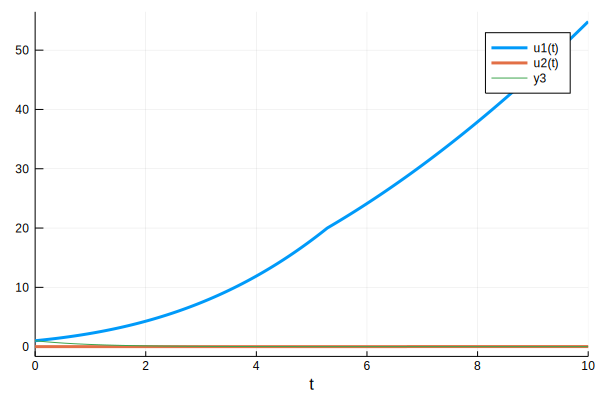

In [14]:
p = Dict([(:a_0,1.0),(:a_b,.75),
          (:b_0,0.1),(:b_b,1.0),
          (:c_0,0.1),(:c_b,1.0),
          (:L,1),(:Ma,20)])
M0 = [1.,0.0]
tspan = (0.0,10)
prob = ODEProblem(dM,M0,tspan,p)
cb = CallbackSet(TerminateSteadyState())
sol = solve(prob,Rosenbrock23(),callback = cb)

plot(sol)
plot!(sol.t,1 .* exp.(-sol.t / p[:L] ))